<a href="https://colab.research.google.com/github/ayushxx7/pandas-course-project/blob/master/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Analysis with Python: Zero to Pandas - Course Project Guidelines
#### (remove this cell before submission)

Make submissions here:  https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project

This is the starter notebook for the course project for [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas). For the course project, you will pick a real-world dataset of your choice and apply the concepts learned in this course to perform exploratory data analysis. Use this starter notebook as an outline for your project (you can also start with an empty new notebook). Focus on documentation and presentation - this Jupyter notebook will also serve as a project report, so make sure to include detailed explanations whererver possible using Markdown cells.

#### Step 1: Select a real-world dataset 

- Find and download an interesting real-world dataset (see the Recommended Datasets section below for ideas). 

- The dataset should contain tabular data (rowsn & columns), preferably in CSV/JSON/XLS or other formats that can be read using Pandas. If it's not in a compatible format, you may have to write some code to convert it to a desired format.
- The dataset should contain at least 3 columns and 150 rows of data. You can also combine data from multiple sources to create a large enough dataset.


#### Step 2: Perform data preparation & cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


#### Step 3: Perform exploratory Analysis & Visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

#### Step 4: Ask & answer questions about the data

- Ask at least 5 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


#### Step 5: Summarize your inferences & write a conclusion

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- Share links to resources you found useful during your analysis


#### Step 6: Make a submission & share your work

- Upload your notebook to your Jovian.ml profile using `jovian.commit`.
- **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684

- Browse through projects shared by other participants and give feedback


#### (Optional) Step 7: Write a blog post

- A blog post is a great way to present and showcase your work.  
- Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
- Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
- Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml



### Recommended Datasets


Use the following resources for finding interesting datasets:

- [Recommended datasets for the course project](https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
- [awesome-public-datasets](https://github.com/awesomedata/awesome-public-datasets)
- [Google Dataset Search](https://datasetsearch.research.google.com)
- [Your personal data from online services](https://www.popsci.com/download-digital-personal-information/)



### Example Projects

Refer to these projects for inspiration:

* [Analyzing your browser history using Pandas & Seaborn](https://medium.com/free-code-camp/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51) by Kartik Godawat

* [WhatsApp Chat Data Analysis](https://jovian.ml/PrajwalPrashanth/whatsapp-chat-data-analysis) by Prajwal Prashanth

* [Analyzing Covid-19 data using Pandas](https://jovian.ml/aakashns/python-pandas-data-analysis) 

* [Understanding the Gender Divide in Data Science Roles](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) by Aakanksha N S

* [2019 State of Javscript Survey Results](https://2019.stateofjs.com/demographics/)

* [2020 Stack Overflow Developer Survey Results](https://insights.stackoverflow.com/survey/2020)


### Evaluation Criteria

Your submission will be evaluated using the following criteria:

* Dataset must contain at least 3 columns and 150 rows of data
* You must ask and answer at least 5 questions about the dataset
* Your submission must include at least 5 visualizations (graphs)
* Your submission must include explanations using markdown cells, apart from the code.
* Your work must not be plagiarized i.e. copy-pasted for somewhere else.


**NOTE**: Remove this cell containing the instructions before making your submission. You can do using the "Edit > Delete Cells" menu option.

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1TyooF3dWsfH-U9u8Bp4g-jIZW1ufaD8C')

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 465, in run
    working_set = pkg_resources.WorkingSet(lib_locations)
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 567, in __init__
    self.add_entry(entry)
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 623, in add_entry
    for dist in find_distributions(entry, True):
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2061, in find_on_path
    path_item_entries = _by_version_descending(filtered)
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2034, in _by_version_descending
    return sorted(names, key=_by_version, re

# Analyzing the Android App Store

The project aims at providing a meaningful insight into the Android App Store.

The dataset consists of sraped from the Google Play Store page for applications. 
The following Features are present in the Dataset:
- App Name: Name of the app
- Category: Category of the such as a Game, Tools, etc.
- Rating: User Rating from 1 to 5	
- Reviews: Number of reviews for each app
- Size: The installation size of the App
- Installs: The number of times an app has been installed
- Content Rating: Whether the app is for Everyone, or for mature audience	
- Genres: Subcategories within each category
- Last Updated: When was the app last updated
- Current Ver: a.b.c.d type App Version (developer specified)
- Android Ver: The Android Version(s) on which an App is supported

The dataset can be found here: https://www.kaggle.com/lava18/google-play-store-apps. It was picked from the [List of Recommended Datasets](https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711) which is part of the course project.

Tools:
- pandas: the data analysis library
- numpy: array operations library
- seaborn: visualization library
- scipy: statistical analysis
- datetime: to work with data containing dates
- matplotlib: visualization library
- plotly: visualization library

This project is part of the following [course](http://zerotopandas.com).
I have learned a lot about pandas, numpy and visualization of data. I have also understood why it is important to analyze information and what are some good techniques to do so.

In [ ]:
project_name = "analyzing-the-android-app-store" # change this

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

## Data Preparation and Cleaning

- Data Clean Up: removal of unncessary or wrong information
- Normalization: Converting data to correct format required for analysis
- Addition of New Columns from current columns in the process


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1A0Eu8KuHG8ZHi7qufUy9nNdA0yArEIor3_2Yv3RYZ2I/export?gid=0&format=csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Functions:

- `pd.read_csv`: used to generate dataframe from a csv file, present in the system or on google sheets (as in our case)
- `df.head()`: to show a part of the dataframe starting from the very first entry

Note:
- `pd`: refers to the pandas library
- `df`: refers to any pandas `dataframe` object

When plotting graph for Category against Type, found that there was a type `0`. However, only `Free` and `Paid` were expected. Hence, cleaned that entry using Pandas.

In [ ]:
# First find out the rows which have incorrect data for `Type`
fix_this_row = df.loc[df['Type'] == "0"]
# Convert the dataframe to list for easy operation
list_to_fix = fix_this_row.values.tolist()
# Add add correct cateogy (checked on PlayStore)
list_to_fix[0].insert(1, "LIFESTYLE")
# remove the last element from the list as one element has been added in between
list_to_fix[0].pop(-1)

nan

Properites Used: 

- `df.loc`: This function lets us select a range of data from the dataframe based on the criteria that is passed to it.
- `df.values`: This will generate a ndarray object containing the values of the dataframe. 

In [ ]:
# set the updated value for the row
df.loc[10472] = list_to_fix[0]
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        Lifestyle
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

While Plotting top 10 Apps, it was found that there are duplicate entries in the Apps. Hence, removing duplicate rows based on `App` column.

In [ ]:
# Removing duplicate entries for same App
df.drop_duplicates(subset="App", keep='first', inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Function Used:

- `df.dropduplicates()`: This function deletes duplicate rows based on the subset parameter which takes in the column name. The parameter keep is used as follows:
  - `keep=False`: Remove the rows entirely (remove the duplicates as well as the original)
  - `keep=last`: Keep the last occurence
  - `keep=first`: Keep the first occurence

In [ ]:
# check if there are discrepencies in rating data
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

Function Used:
- `df['Column Name'].unique()`: It returns an array of unique values from the column passed as parameter

In [ ]:
# fill the nan values with 0 to make the column numeric. 
# 0 is a value we can ignore later on as well, because no app can have 0 ratings
df.Rating = df.Rating.fillna(0)
df.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, 0, 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2,
       '1.9'], dtype=object)

Function:

- `df['Column Name'].fillna()`: It fills the `nan` values with the desired value paased as parameter

In [ ]:
df.Rating = df.Rating.astype(float)
df['Round Rating'] = df.Rating.round().astype(int)
df['Round Rating'].unique()

array([4, 5, 3, 0, 2, 1])

Functions:

- `df.column_name.astype()`: converts the dataframe column to specified type
- `df.column_name.round()`: converts the values in the column to rounded values

In [ ]:
# make the Installs column to numeric (int)
df.Installs = df['Installs'].replace({'\+': ''}, regex=True)
df.Installs = df['Installs'].replace({',': ''}, regex=True)

df.Installs = df.Installs.astype(int)
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9660, dtype: int64

Function:

- `df.colname.replace()`: Replace the matching values with the desired values. The parameter `regex` is used to specify whether the pattern to match is a Regular Expression or an exact string.

In [ ]:
# make the Price numeric (float)
df.Price = df['Price'].replace({'\$': ''}, regex=True)
df.Price = df.Price.astype(float)
df.Price.unique()
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9660, dtype: float64

In [ ]:
# convert the last update column to datetime
df["Last Updated"] = pd.to_datetime(df['Last Updated'])
df["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9660, dtype: datetime64[ns]

Function:

- `pd.to_datetime()`: the to_datetime function is used to convert the column containing date values to datetime objects

In [ ]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
size_list = []
size_df = df.Size.tolist()
print(len(size_df))
for size in size_df:
  if "M" in size:
    convert = float(size.split("M")[0])*1024
    size_list.append(convert)
  elif "k" in size:
    convert = float(size.split("k")[0])
    size_list.append(convert)
  else:
    size_list.append(0)
print(len(size_list))
df['Normalized Size'] = size_list
df['Normalized Size']

9660
9660


0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10836    54272.0
10837     3686.4
10838     9728.0
10839        0.0
10840    19456.0
Name: Normalized Size, Length: 9660, dtype: float64

Function:

- `df.col_name.tolist()`: converts dataframe column to python list object

In [ ]:
df.Reviews = df.Reviews.astype(int)

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

## Exploratory Analysis and Visualization

### Visaulization
- Number of Apps in each Category
- Distribution of Free and Paid Apps
- Average Rating against App Type and App Installs
- Cateogy vs Content Rating
- Top 10 Apps by Installs and Ratings
- Category vs Installs Percentage Distribution
- Pair Plot (Plot of All columns against each other)
- Histograms (App Size and Ratings)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import scipy.stats as sc
import numpy as np
import datetime

##### Number of Apps in each Category

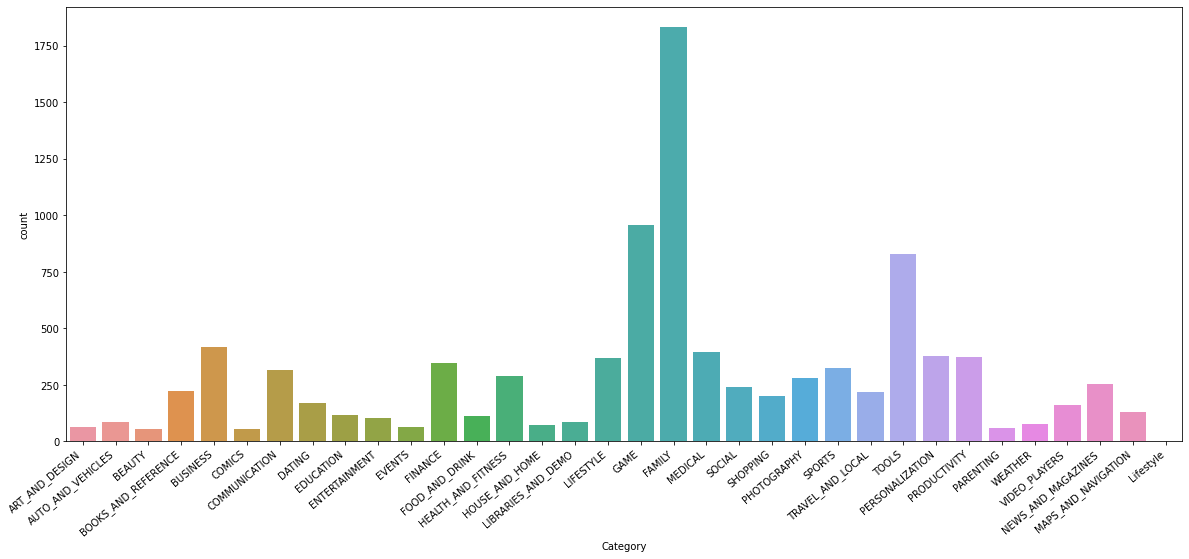

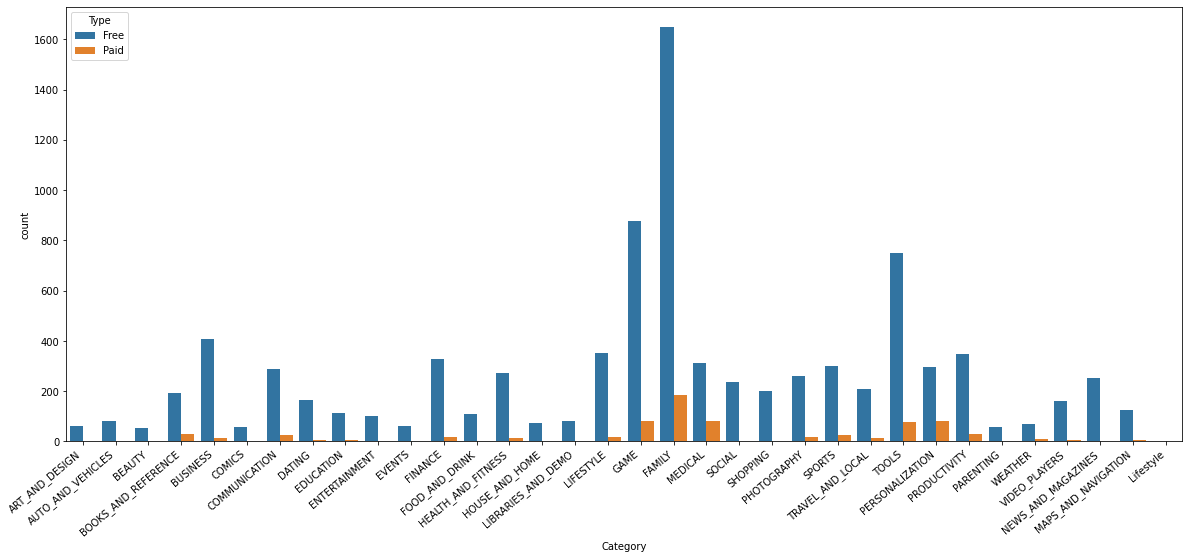

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Category", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(20,8))
ax = sns.countplot(x="Category", hue="Type", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Functions:

- plt.figure(): This functions lets us specify properties such as size of the figure
- sns.countplot(): used for plotting counts of a specific value
- ax.set_xticklabels(): used to change the orientation of the tick labels on the `x` axis
- ax.get_xticklabels(): get the tick values on the x axis
- plt.show(): This is used to display the plot

Note: 
- `plt` refers to the matplotlib library
- `sns` refers to the seaborn libarary
- `ax` refers to the sns plot object
- You can replace `x` with `y` in `get_xticklabels` & `set_xticklabels` to perform the operation on the `y` axis


##### Distribution of Free and Paid Apps across the App Store

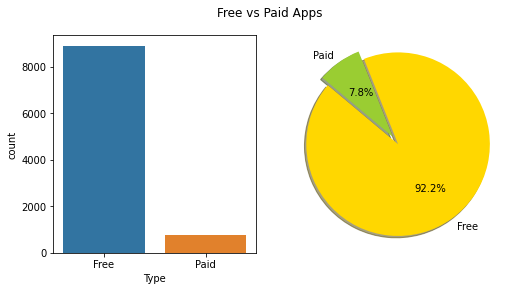

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))

plt.suptitle('Free vs Paid Apps')

ax = sns.countplot(x="Type", data=df, ax=ax1)

labels = 'Free', 'Paid'
sizes = [df.Type.value_counts()[0], df.Type.value_counts()[1]]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

plt.show()

Functions:

- plt.subplot(): This is used to plot multiple figures as part of the same plot, so that the figures can appear side by side
- plt.suptitle(): to set main title common to all subplots.
- ax2.pie(): To plot a pie chart
- df.col.value_counts(): generates a mapping of the value and the number of times that value has occured in the col.

Note:
- ax2 refers to the subplot #2 in this figure

##### Average Rating against App Type & App Installs

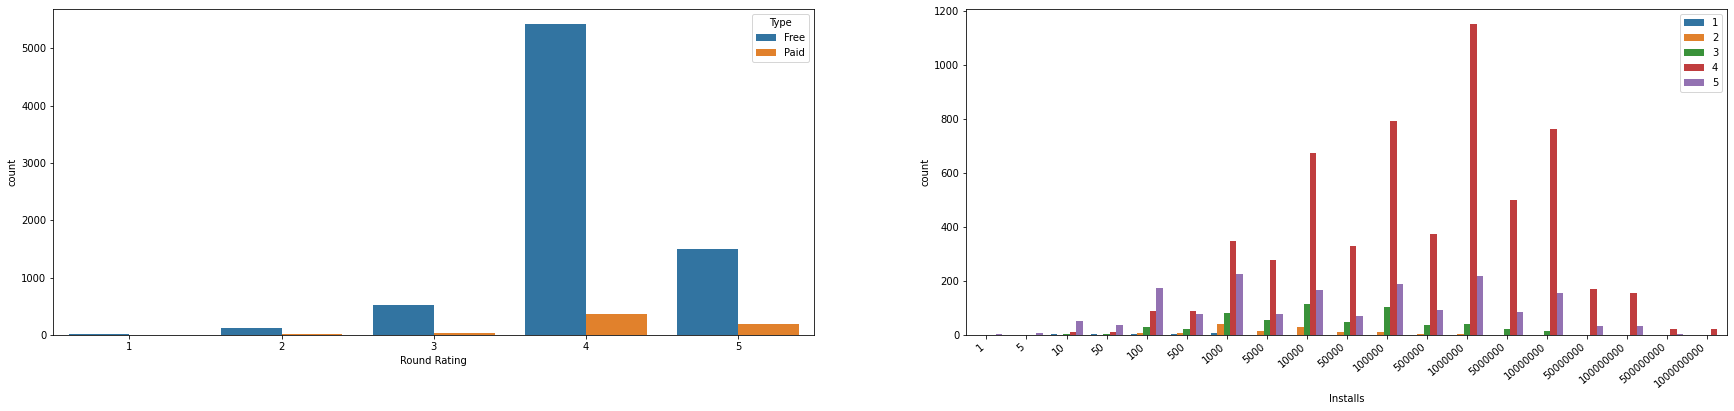

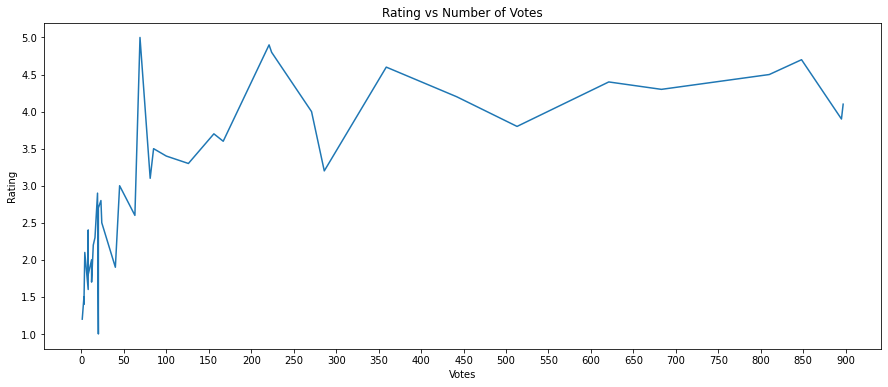

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,6))

mask = df['Round Rating'].isin([0])
ax = sns.countplot(x="Round Rating", hue="Type", data=df[~mask], ax=ax1)

ax2 = sns.countplot(x="Installs", hue="Round Rating", data=df[~mask], ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.legend(loc='upper right')
plt.show()

mask = df.Rating.isin([0])
rating_fixed_df = df[~mask]

fig, ax = plt.subplots(1,1, figsize=(15,6))
tick_spacing = 50
ax.plot(rating_fixed_df.Rating.value_counts().tolist(),rating_fixed_df.Rating.unique().tolist())
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Rating vs Number of Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

To remove some entries from the dataframe during some analysis,
one can apply a mask on the dataframe. 

In this technique, 
- First identify the rows that you want to mask
- and store them in a separate dataframe object
- After this, you would use the `~` (`df[~mask]`) sign to ignore the masked value (as shown above)

Function:


- df.col_name.isin(): Matches the value list passed as parameter against the column value on which the operation is being performed
- ax.legend(): To set the configuration of the lengend on a figure
- ax.xaxis.set_major_locator(): used to set the tick spacing on the x axis
- plt.title(): set the title of the plot
- plt.xlabel(): set the name of the x column
- plt.ylabel(): set the name of the y column

##### Category vs Content Rating

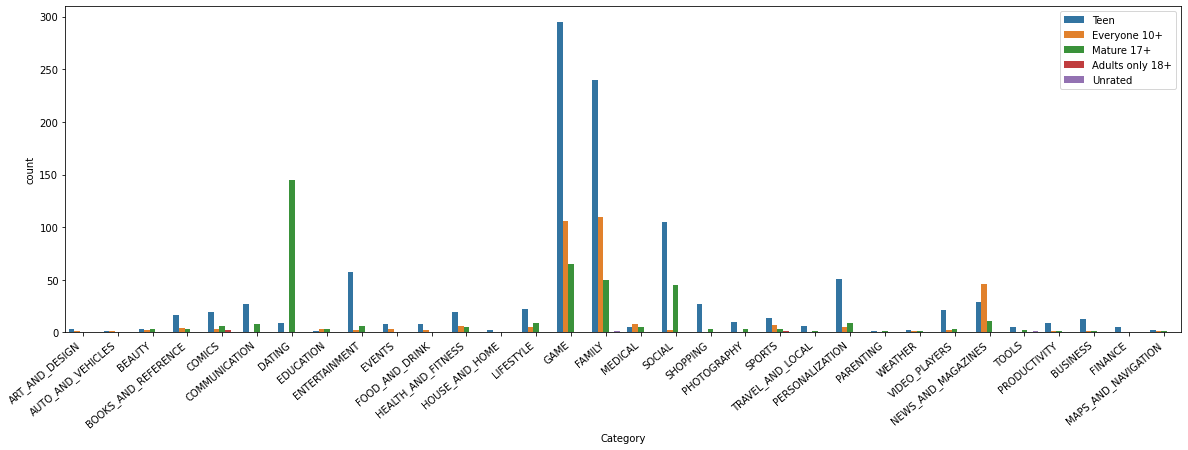

In [ ]:
plt.figure(figsize=(20,6))
mask = df['Content Rating'].isin(['Everyone'])
ax = sns.countplot(x="Category", hue="Content Rating", data=df[~mask])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(loc='upper right')
plt.show()

##### Top 10 Apps by Installs and Ratings

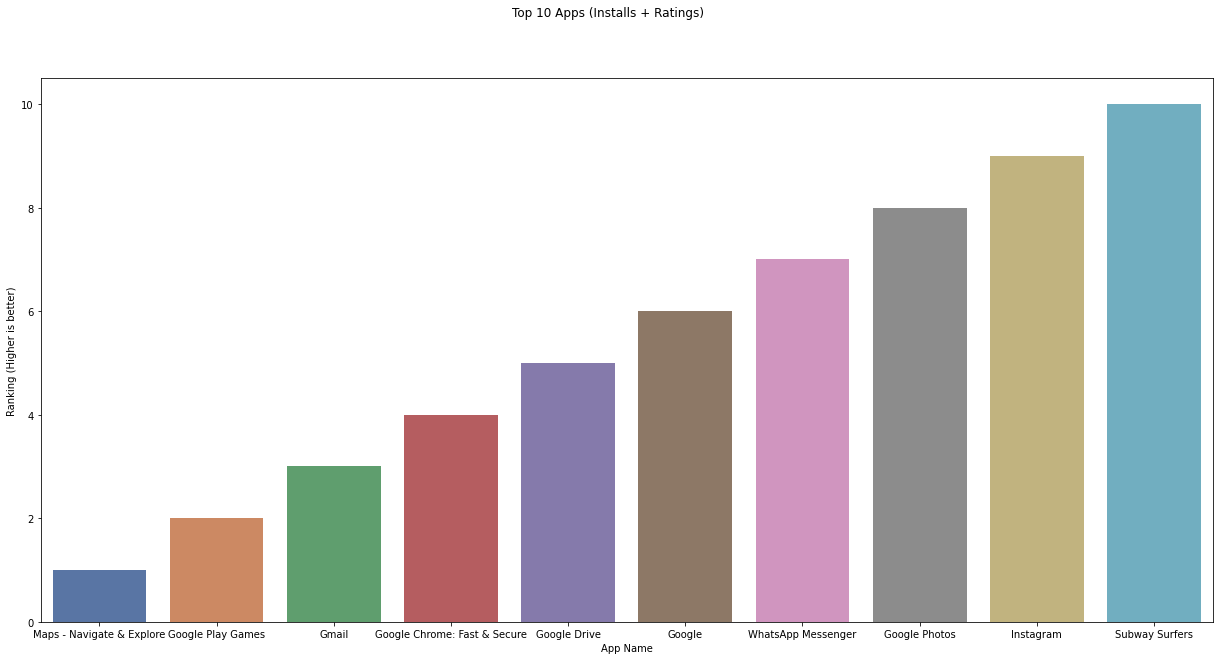

In [ ]:
x1 = df.sort_values(['Installs', 'Rating'], ascending=False).head(10)
x1 = x1['App'].tolist()[::-1]

plt.figure(figsize=(21,10))
y1 = np.arange(1, 11)
ax1 = sns.barplot(x=x1, y=y1, palette="deep")
plt.suptitle("Top 10 Apps (Installs + Ratings)")
plt.xlabel('App Name')
plt.ylabel('Ranking (Higher is better)')
plt.show()

Functions:

- df.sort_values(): Sort the dataframe based on the values present in the columns passed. The priority of the sort is based on the order of the column_names passed
- np.arange(): generate an array object based on the range provided
- sns.barplot(): plot a bargraph with the x & y values

##### Category vs Install Percentage Distribution

In [ ]:
dfp = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

category = list(dfp.Category)
installs = list(dfp.Installs)

fig= go.Figure(go.Treemap(
    labels =  category,
    parents=[""]*len(category),
    values =  installs,
    textinfo = "label+percent entry"
))
fig.update_layout(
    autosize=False,
    width= 800,
    height=800,)

fig.show()

Functions used:

- `df.groupby()`: similar to group in sql, i.e if a value occurs mutiple times, the selected columns are grouped together and the individual values are summed up.
- `df.col.sum()`: to calculate sum over the specified column
- `df.reset_index()`: set index to the default one
- `go.Figure()`: to generate special interactive interactive graphs such as a Treemap

##### Pair Plot

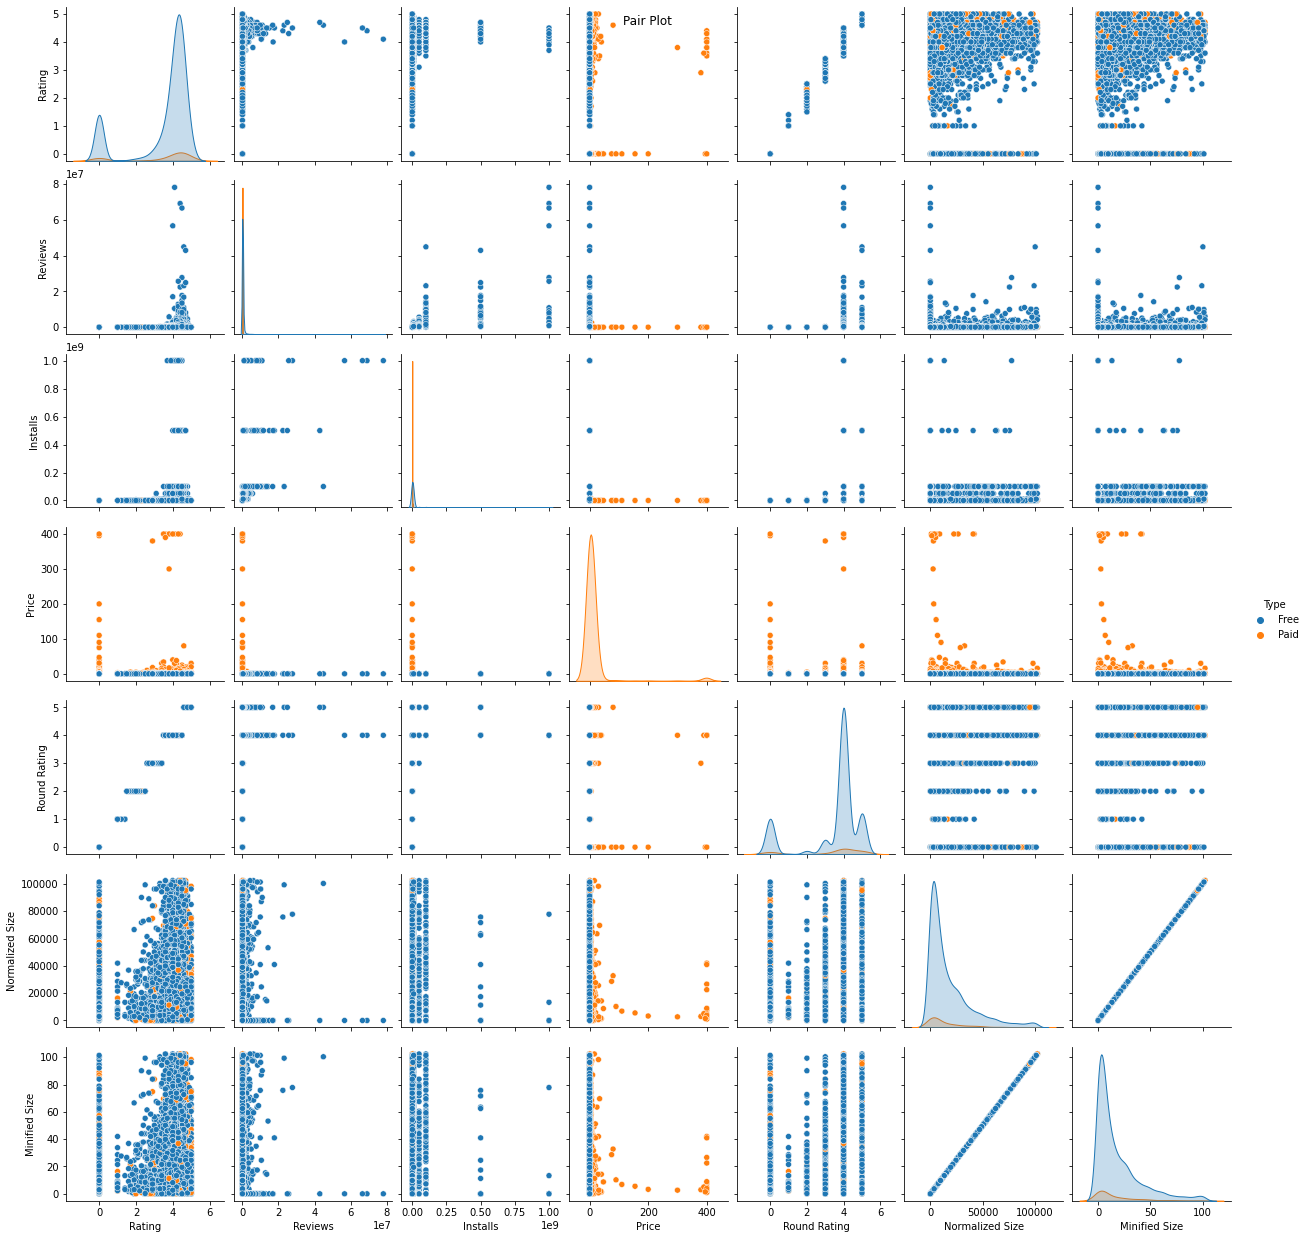

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df, hue='Type')

Functions:

- `sns.pairplot()`: plot all columns against each other in pairs

##### Histograms
- Size
- Rating




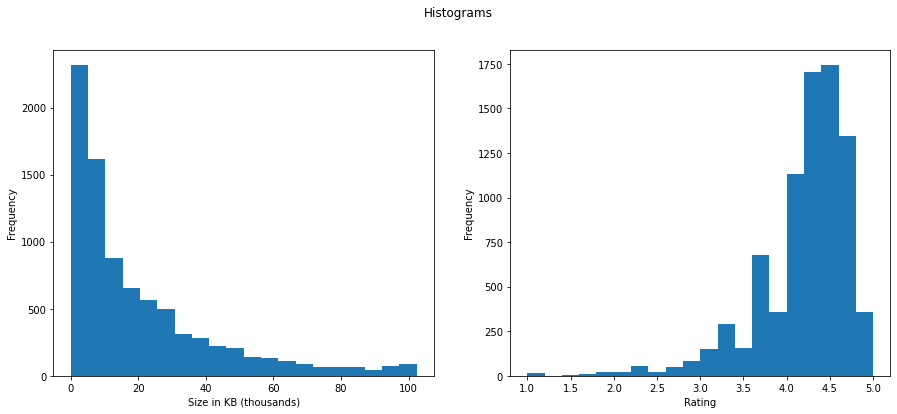

In [ ]:
size_list = []
for size in df['Normalized Size']:
  size_list.append(size/1000)
df['Minified Size'] = size_list
mask = df['Minified Size'].isin([0])
masked_df = df[~mask]
# masked_df.loc[masked_df['Minified Size'] == 0]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
masked_df['Minified Size'].plot(kind='hist', bins=20, ax=ax1)
mask = df['Rating'].isin([0])
masked_df = df[~mask]
masked_df['Rating'].plot(kind='hist', bins=20, ax=ax2)
plt.suptitle('Histograms')
ax1.set_xlabel('Size in KB (thousands)')
ax2.set_xlabel('Rating')
plt.show()

Function:

`df.plot()`: To plot column values in graph

### Statistical Analysis

##### Stats for Rating

In [ ]:
mask = df['Rating'].isin([0])
masked_df = df[~mask]
print("---Stats for Rating---")
print(f"Mean of Rating: {np.mean(masked_df['Rating'])}")
print(f"Median of Rating: {np.median(masked_df['Rating'])}")
print(f"Mode of Rating: {sc.mode(masked_df['Rating'])[0][0]}")
print(f"Rating ranges from minimum:{masked_df.Rating.min()} to maximum:{masked_df.Rating.max()}")
print(f"Stadard Deviation of Rating: {np.std(masked_df['Rating'])}")
print(f"Variance of Rating: {np.var(masked_df['Rating'])}")

---Stats for Rating---
Mean of Rating: 4.1729657191655525
Median of Rating: 4.3
Mode of Rating: 4.3
Rating ranges from minimum:1.0 to maximum:5.0
Stadard Deviation of Rating: 0.5371463421826722
Variance of Rating: 0.2885261929202244


Functions used:

- `np.mean()`: calculate arithmetic mean over input values
- `np.median()`: calculate arithmetic median over input values
- `sc.mode()`: calculate arithmetic mode over input values
- `df.col_name.min()`: extract minimum value of column
- `df.col_name.max()`: extract maximum value of column
- `np.std()`: calculate standard deviation over input values
- `np.var()`: calculate variance over input values

##### Stats for Reviews

In [ ]:
print("---Stats for Reviews---")
print(f"Mean of Reviews: {np.mean(df['Reviews'])}")
print(f"Median of Reviews: {np.median(df['Reviews'])}")
print(f"Mode of Reviews: {sc.mode(df['Reviews'])[0][0]}")
print(f"Reviews ranges from minimum:{df.Reviews.min()} to maximum:{df.Reviews.max()}")
print(f"Stadard Deviation of Reviews: {np.std(df['Reviews'])}")
print(f"Variance of Reviews: {np.var(df['Reviews'])}")

---Stats for Reviews---
Mean of Reviews: 216570.14420289855
Median of Reviews: 967.0
Mode of Reviews: 0
Reviews ranges from minimum:0 to maximum:78158306
Stadard Deviation of Reviews: 1831131.304449587
Variance of Reviews: 3353041854135.246


##### Stats for Installs

In [ ]:
print("---Stats for Installs---")
print(f"Mean of Installs: {np.mean(df['Installs'])}")
print(f"Median of Installs: {np.median(df['Installs'])}")
print(f"Mode of Installs: {sc.mode(df['Installs'])[0][0]}")
print(f"Installs ranges from minimum:{df.Installs.min()} to maximum:{df.Installs.max()}")
print(f"Stadard Deviation of Installs: {np.std(df['Installs'])}")
print(f"Variance of Installs: {np.var(df['Installs'])}")

---Stats for Installs---
Mean of Installs: 7776701.710869566
Median of Installs: 100000.0
Mode of Installs: 1000000
Installs ranges from minimum:0 to maximum:1000000000
Stadard Deviation of Installs: 53752771.58216836
Variance of Installs: 2889360452764766.5


In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

## Asking and Answering Questions

- Most Popuar App
- Size Based Analysis
- Last Updated
- Android Version Compatibility
- Category Analysis


In [ ]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating,Normalized Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5,8908.8


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating,Normalized Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,4,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,5,8908.8


#### MOST POPULAR APP

Q1) Which is the Most Popular app based on Reviews?

In [ ]:
maximum_reviews = df.Reviews.max()
app_name = df.loc[df.Reviews == maximum_reviews]['App'].tolist()[0]
print(f"The most Popular App based on Reviews is `{app_name}`")

The most Popular App based on Reviews is `Facebook`


Q2) Which is the Most popular App based on Ratings & Installs


In [ ]:
sorted_df = df.sort_values(['Installs', 'Rating'], ascending=False).head(10)
app_name = sorted_df['App'].tolist()[0]
print(f"The Most Popular App based on Installs -> Ratings: {app_name}")

sorted_df = df.sort_values(['Rating', 'Installs'], ascending=False).head(10)
app_name = sorted_df['App'].tolist()[0]
print(f"The Most Popular App based on Ratings -> Installs: {app_name}")

The Most Popular App based on Installs -> Ratings: Subway Surfers
The Most Popular App based on Ratings -> Installs: Ek Bander Ne Kholi Dukan


In [ ]:
# Verifying whether the Ratings -> Installs Analysis is accurate
df.Rating.value_counts()
df.loc[df.Rating == 4.3]
df.Installs.value_counts()
print(df.loc[df.Rating == 5]['Installs'].max())
df.loc[df.App == 'Ek Bander Ne Kholi Dukan']

10000


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating,Normalized Size
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0M,10000,Free,0.0,Everyone,Entertainment,2017-06-26,1.0.9,4.0 and up,5,3072.0


Q3) Which is the Most Popular App for every `Content Rating`?

In [ ]:
for each_content_rating in df['Content Rating'].unique():
  each_df = df.loc[df['Content Rating'] == each_content_rating]

  sorted_df = each_df.sort_values(['Installs', 'Rating'], ascending=False).head(10)
  app_name = sorted_df['App'].tolist()[0]
  print(f"The Most Popular App among `{each_content_rating}` based on Installs (P1) and Ratings (P2): {app_name}")

The Most Popular App among `Everyone` based on Installs (P1) and Ratings (P2): Google Photos
The Most Popular App among `Teen` based on Installs (P1) and Ratings (P2): Instagram
The Most Popular App among `Everyone 10+` based on Installs (P1) and Ratings (P2): Subway Surfers
The Most Popular App among `Mature 17+` based on Installs (P1) and Ratings (P2): Twitter
The Most Popular App among `Adults only 18+` based on Installs (P1) and Ratings (P2): DraftKings - Daily Fantasy Sports
The Most Popular App among `Unrated` based on Installs (P1) and Ratings (P2): DC Universe Online Map


#### SIZE BASED ANALYSIS

Q4) Which apps have the greatest and smallest size?

In [ ]:
max_size = df['Normalized Size'].max()
app_name = df.loc[df['Normalized Size'] == max_size]['App'].tolist()
print(f"The Apps with Maximum Size ({max_size/1024}MB) are:")
for index, app in enumerate(app_name):
  print(f"{index+1}: {app}")


mask = df['Normalized Size'].isin([0])
masked_df = df[~mask]
min_size = masked_df['Normalized Size'].min()
app_name = masked_df.loc[masked_df['Normalized Size'] == min_size]['App'].tolist()[0]
print(f"\n\nThe app with Minium Size ({min_size}KB) is `{app_name}`")

The Apps with Maximum Size (100.0MB) are:
1: Post Bank
2: Talking Babsy Baby: Baby Games
3: Hungry Shark Evolution
4: Mini Golf King - Multiplayer Game
5: Navi Radiography Pro
6: Vi Trainer
7: Ultimate Tennis
8: The Walking Dead: Our World
9: Miami crime simulator
10: Gangster Town: Vice District
11: SimCity BuildIt
12: Car Crash III Beam DH Real Damage Simulator 2018
13: Draft Simulator for FUT 18
14: Stickman Legends: Shadow Wars


The app with Minium Size (8.5KB) is `Essential Resources`


In [ ]:
# Verifying if Max size values are correct
df.Size.unique()
df.loc[df.Size == "100M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating,Normalized Size
1080,Post Bank,FINANCE,4.5,60449,100M,1000000,Free,0.00,Everyone,Finance,2018-07-23,2.9.12,4.0 and up,4,102400.0
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100M,10000000,Free,0.00,Everyone,Lifestyle;Pretend Play,2018-07-16,9,4.0 and up,4,102400.0
1758,Hungry Shark Evolution,GAME,4.5,6074334,100M,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,4,102400.0
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100M,5000000,Free,0.00,Everyone,Sports,2018-07-20,3.04.1,4.0.3 and up,4,102400.0
2299,Navi Radiography Pro,MEDICAL,4.7,11,100M,500,Paid,15.99,Everyone,Medical,2018-01-14,1.2.0,4.0.3 and up,5,102400.0
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100M,5000,Free,0.00,Everyone,Health & Fitness,2018-08-02,2.0.0.11,5.0 and up,4,102400.0
5427,Ultimate Tennis,SPORTS,4.3,183004,100M,10000000,Free,0.00,Everyone,Sports,2018-07-19,2.29.3118,4.0.3 and up,4,102400.0
5530,The Walking Dead: Our World,GAME,4.0,22435,100M,1000000,Free,0.00,Teen,Action,2018-08-01,1.1.0.3,5.0 and up,4,102400.0
5862,Miami crime simulator,GAME,4.0,254518,100M,10000000,Free,0.00,Mature 17+,Action,2018-07-09,2,4.0 and up,4,102400.0
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100M,10000000,Free,0.00,Mature 17+,Simulation,2018-05-31,2.1,4.0 and up,4,102400.0


Q5) Find out the App with Maximum Size which has the Highest Number of Installs?

In [ ]:
sorted_df = df.sort_values(['Installs', 'Normalized Size'], ascending=False).head(10)
app_name = sorted_df['App'].tolist()[0]
app_size = sorted_df['Size'].tolist()[0]
print(f"The Most Installed App with the Highest Size ({app_size}): {app_name}")

sorted_df = df.sort_values(['Normalized Size', 'Installs'], ascending=False).head(10)
app_name = sorted_df['App'].tolist()[0]
app_size = sorted_df['Size'].tolist()[0]
print(f"The Highest Size ({app_size}) App with the most Installs: {app_name}")

The Most Installed App with the Highest Size (76M): Subway Surfers
The Highest Size (100M) App with the most Installs: Hungry Shark Evolution


#### LAST UPDATED

In [ ]:
df.sort_values(by=('Last Updated'), ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round Rating,Normalized Size
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6M,50000,Free,0.00,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up,4,3686.4
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,4,2457.6
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,Varies with device,1000000,Free,0.00,Everyone,Shopping,2018-08-08,Varies with device,Varies with device,4,0.0
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27M,50000000,Free,0.00,Teen,Action,2018-08-08,1.1.2,4.1 and up,4,27648.0
10718,BankNordik,FINANCE,3.9,28,15M,5000,Free,0.00,Everyone,Finance,2018-08-08,7.3.2,5.0 and up,4,15360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8084,Freecell CY,GAME,4.0,387,1.1M,50000,Free,0.00,Everyone,Card,2011-04-16,1.3.3,1.6 and up,4,1126.4
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,5000000,Free,0.00,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up,4,4198.4
10282,FD Shift Calendar Widget,TOOLS,4.1,981,73k,100000,Free,0.00,Everyone,Tools,2011-03-16,1.2.4,1.6 and up,4,73.0
7430,CJ Poker Odds Calculator,GAME,4.1,207,116k,50000,Free,0.00,Everyone,Card,2011-01-30,1.2,1.6 and up,4,116.0


Q6) Which are the most recently updated and the least recently updated Apps?

In [ ]:
most_recent_update = df['Last Updated'].max()
recent_df = df.loc[df['Last Updated'] == most_recent_update]

print(f"The Most Recently Updated Apps are:")
for index, row in recent_df.iterrows():
  print("->", row['App'])
print(f"They were all updated on: {most_recent_update.date()}\n\n")

least_recent_update = df['Last Updated'].min()
recent_df = df.loc[df['Last Updated'] == least_recent_update]

print(f"The Least Recently Updated App is:")
for index, row in recent_df.iterrows():
  print("->", row['App'])
print(f"It was updated on: {least_recent_update.date()}")

The Most Recently Updated Apps are:
-> Video Downloader For FB: Save FB Videos 2018
-> Shoot Hunter-Gun Killer
-> Lalafo Pulsuz Elanlar
-> BankNordik
-> Fast Tract Diet
They were all updated on: 2018-08-08


The Least Recently Updated App is:
-> FML F*ck my life + widget
It was updated on: 2010-05-21


Function:

- `df.iterrows()`: like inbuilt `enumerate` function but for dataframe objects. Iterate over a dataframe, row by row, with values unpacked as dataframe index, dataframe row.

Q7) Which is the Most Recently Updated App with the Highest Installs?

In [ ]:
sorted_df = df.sort_values(['Installs', 'Last Updated'], ascending=False).head(10)
app_name = sorted_df['App'].tolist()[0]
update_date = sorted_df['Last Updated'].tolist()[0]
print(f"The Most Installed App which was most recently updated ({update_date.date()}): {app_name}")

sorted_df = df.sort_values(['Last Updated', 'Installs'], ascending=False).head(10)
app_name = sorted_df['App'].tolist()[0]
update_date = sorted_df['Last Updated'].tolist()[0]
print(f"The Most recently updated app ({update_date.date()}) with the Highest Installs: {app_name}")

The Most Installed App which was most recently updated (2018-08-06): Google Photos
The Most recently updated app (2018-08-08) with the Highest Installs: Shoot Hunter-Gun Killer


#### ANDROID VERSION COMPATIBILITY

Q8) Which is the Most Supported Android Version?

In [ ]:
android_ver_count = df['Android Ver'].value_counts()
print(android_ver_count[0:5])
print(f'\n\nLooking at the the top 5, it is clear that Android 4 is the most compatible and supported Android Version.')

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1286
Varies with device     990
4.4 and up             818
Name: Android Ver, dtype: int64


Looking at the the top 5, it is clear that Android 4 is the most compatible and supported Android Version.


#### CATEGORY ANALYSIS

Q9) Which are the `TOP 3` Categories with Highest Number of Installs?

In [ ]:
category_df = df.groupby(by=['Category']).sum().sort_values(by=['Installs'], ascending=False).head(3)
print("The Top 3 Categories with Highest Numer of Installs:")

for category, value in category_df.iterrows():
  print(f"-> {category}")

The Top 3 Categories with Highest Numer of Installs:
-> GAME
-> COMMUNICATION
-> TOOLS


Q10) How Many Apps are there in each Category?

There are `1832` apps in `FAMILY` Category
There are `959` apps in `GAME` Category
There are `827` apps in `TOOLS` Category
There are `420` apps in `BUSINESS` Category
There are `395` apps in `MEDICAL` Category
There are `376` apps in `PERSONALIZATION` Category
There are `374` apps in `PRODUCTIVITY` Category
There are `369` apps in `LIFESTYLE` Category
There are `345` apps in `FINANCE` Category
There are `325` apps in `SPORTS` Category
There are `315` apps in `COMMUNICATION` Category
There are `288` apps in `HEALTH_AND_FITNESS` Category
There are `281` apps in `PHOTOGRAPHY` Category
There are `254` apps in `NEWS_AND_MAGAZINES` Category
There are `239` apps in `SOCIAL` Category
There are `222` apps in `BOOKS_AND_REFERENCE` Category
There are `219` apps in `TRAVEL_AND_LOCAL` Category
There are `202` apps in `SHOPPING` Category
There are `171` apps in `DATING` Category
There are `163` apps in `VIDEO_PLAYERS` Category
There are `131` apps in `MAPS_AND_NAVIGATION` Category
There are `119` a

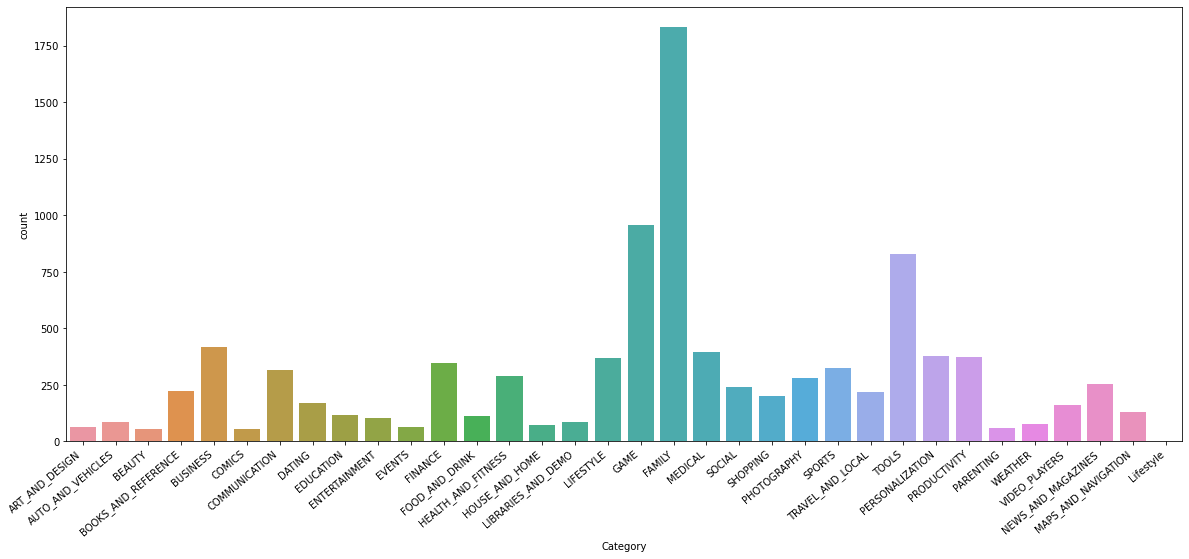

In [ ]:
category_count = df.Category.value_counts()
for column, value in category_count.iteritems():
  print(f"There are `{value}` apps in `{column}` Category")

plt.figure(figsize=(20,8))
ax = sns.countplot(x="Category", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Function:

`df.iteritems()`: Iterate over (column name, Series) pairs.

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'

# Inferences and Conclusion

## What I have Learned

### Personal Growth

I have learned a lot during this course project. Some of the key aspects are listed below:
- how to interact with datasets (cleaning, normalization etc.)
- how we can use the pandas library for extracting information, updating dataset and data analysis 
- how to use the matplotlib and seaborn libraries for Visualiztion of data 
- solving some niche problems related to plots/graphs 
- [Collabotary](https://colab.research.google.com/): how to use, share work

I have also learned a great deal from other people's work on platforms such as [Jovian.ml](https://jovian.ml/) and [Kaggle](https://www.kaggle.com/).

### Functions







#### Pandas

- `pd.read_csv`: used to generate dataframe from a csv file, present in the system or on google sheets (as in our case)
- `pd.to_datetime()`: the to_datetime function is used to convert the column containing date values to datetime objects

#### Pandas DataFrame

- `df.head()`: to show a part of the dataframe starting from the very first entry
- `df.dropduplicates()`: This function deletes duplicate rows based on the subset parameter which takes in the column name. The parameter keep is used as follows:
  - `keep=False`: Remove the rows entirely (remove the duplicates as well as the original)
  - `keep=last`: Keep the last occurence
  - `keep=first`: Keep the first occurence
- `df.sort_values()`: Sort the dataframe based on the values present in the columns passed. The priority of the sort is based on the order of the column_names passed
- `df.groupby()`: similar to group in sql, i.e if a value occurs mutiple times, the selected columns are grouped together and the individual values are summed up.
- `df.iterrows()`: like inbuilt `enumerate` function but for dataframe objects. Iterate over a dataframe, row by row, with values unpacked as dataframe index, dataframe row.
- `df.iteritems()`: Iterate over (column name, Series) pairs.
- `df.plot()`: To plot column values in graph
- `df.reset_index()`: set index to the default one
- (property) `df.loc`: This function lets us select a range of data from the dataframe based on the criteria that is passed to it.
- (property) `df.values`: This will generate a ndarray object containing the values of the dataframe. 

#### Pandas Series (DataFrame Column)

- `df['Column Name'].fillna()`: It fills the `nan` values with the desired value paased as parameter
- `df.column_name.astype()`: converts the dataframe column to specified type
- `df.column_name.round()`: converts the values in the column to rounded values
- `df.colname.replace()`: Replace the matching values with the desired values. The parameter `regex` is used to specify whether the pattern to match is a Regular Expression or an exact string.
- `df.col_name.tolist()`: converts dataframe column to python list object
- `df.col.value_counts()`: generates a mapping of the value and the number of times that value has occured in the col.
- `df.col_name.isin()`: Matches the value list passed as parameter against the column value on which the operation is being performed
- `df.col.sum()`: to calculate sum over the specified column
- `df.col_name.min()`: extract minimum value of column
- `df.col_name.max()`: extract maximum value of column

#### Numpy

- `np.arange()`: generate an array object based on the range provide
- `np.mean()`: calculate arithmetic mean over input values
- `np.median()`: calculate arithmetic median over input values
- `np.std()`: calculate standard deviation over input values
- `np.var()`: calculate variance over input values

#### Scipy

- `sc.mode()`: calculate arithmetic mode over input values

#### Plotting

- `plt.title()`: set the title of the plot
- `plt.xlabel()`: set the name of the x column
- `plt.ylabel()`: set the name of the y column
- `plt.subplot()`: This is used to plot multiple figures as part of the same plot, so that the figures can appear side by side
- `plt.suptitle()`: to set main title common to all subplots.
- `plt.figure()`: This functions lets us specify properties such as size of the figure
- `plt.show()`: This is used to display the plot
- `sns.pairplot()`: plot all columns against each other in pairs
- `sns.barplot()`: plot a bargraph with the x & y values
- `sns.countplot()`: used for plotting counts of a specific value
- `ax.legend()`: To set the configuration of the lengend on a figure
- `ax.xaxis.set_major_locator()`: used to set the tick spacing on the x axis
- `ax2.pie()`: To plot a pie chart
- `ax.set_xticklabels()`: used to change the orientation of the tick labels on the `x` axis
- `ax.get_xticklabels()`: get the tick values on the x axis
- `go.Figure()`: to generate special interactive interactive graphs such as a Treemap

#### Note:
- `pd`: refers to the pandas library
- `df`: refers to any pandas dataframe object
- `plt` refers to the matplotlib library
- `sns`: refers to the seaborn libarary
- `ax`: refers to the sns plot object
- `go`: refers to the plotly.graph_objects class

## About the dataset

### Key Insights

- There are 9660 unique Apps in the dataset
- In the whole dataset there are 8% Paid Apps while the rest of them are free
- The dataset has about 1000 Rows with Ratings missing (an important factor)
- The dataset is old, the most recently updated app is on 2018-08-08

Given these points, my future work would involve scraping the latest data from Google Play Store and doing analysis over that. Afterwards, doing a comparison between the two analysis.

We can also do an analysis in a similar fashion on the Apple App Store Apps.

## References and Future Work

### StackOverflow

- [Select specific rows based on column value](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)

- [Find NaN values in column](https://stackoverflow.com/a/43831589/7048915)

- [Replace part of value](https://stackoverflow.com/questions/38565849/pandas-replace-substring-in-string)

- [How to ignore rows when column values matcha a criteria](https://stackoverflow.com/a/22392870/7048915)

- [Change number of ticks on an axis](https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib)

- [Plot mutiple plots at same level in notebook](https://stackoverflow.com/questions/58887571/plotting-2-pie-charts-side-by-side-in-matplotlib)


### Other Q&A Sources
- [How to fill NaN values in a column](https://www.kite.com/python/answers/how-to-replace-nan-values-with-zeros-in-a-column-of-a-pandas-dataframe-in-python#:~:text=Use%20pandas.,name%20from%20the%20DataFrame%20df%20.)

- [Plot a Piechart](https://pythonspot.com/matplotlib-pie-chart/)

- [Line Plot](https://datatofish.com/line-chart-python-matplotlib/)

- [Drop duplicates](https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/)

- [Seaborn Bar Plot](https://seaborn.pydata.org/examples/palette_choices.html)

- [Set main title for all subplots](https://www.delftstack.com/howto/matplotlib/how-to-set-a-single-main-title-for-all-the-subplots-in-matplotlib/#:~:text=suptitle()%20method%20to%20set,to%20all%20subplots%20in%20Matplotlib.&text=In%20this%20example%20%2C%20axes.,title%20common%20for%20all%20subplots.)

- [Reset Index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

- [Play Store Analysis #1](https://www.kaggle.com/sugandhkhobragade/the-play-store-apps-eda#kln-7)

- [Play Store Analysis #2](https://www.kaggle.com/mdp1990/google-play-app-store-eda-data-visualisation)

- [Play Store Analysis #3](https://www.kaggle.com/saksheeagarwal/eda-and-app-rating-prediction-on-play-store-data)

- [Iteritems](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iteritems.html)

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/ayushxx7/analyzing-the-android-app-store


'https://jovian.ml/ayushxx7/analyzing-the-android-app-store'